<a href="https://colab.research.google.com/github/dyjdlopez/icpep-ai-workshop-2021/blob/main/day3/ICpEP_AI_D3_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Fundamentals of TensorFlow
Copyright D.Lopez 2021 | All Rights reserved <br><br>

[TensorFlow](https://www.tensorflow.org/) is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.<br>
TensorFlow provides several APIs that allow developers to develop a range of AI Apps from data estimation, computer vision, natural language processing, and even reinforcement learning.
![image](https://camo.githubusercontent.com/c04e16c05de80dadbdc990884672fc941fdcbbfbb02b31dd48c248d010861426/68747470733a2f2f7777772e74656e736f72666c6f772e6f72672f696d616765732f74665f6c6f676f5f736f6369616c2e706e67)<br>





In [1]:
# !pip install tensorflow
# !pip install tensorflow-gpu
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt


## Part 1 Tensor Operations
TensorFlow mainly operates using tensors (as its name suggests) so let’s try to use our current knowledge about tensors and apply it with our current platform.

### 1.1 NumPy and TensorFlow
If you have enjoyed using matrices and tensors in NumPy, then performing tensor algebra in TensorFlow will just be a breeze.

In [ ]:
np_tensor = np.array(3)
tf_tensor = tf.constant(3)

print(np_tensor)
print(tf_tensor)

3
tf.Tensor(3, shape=(), dtype=int32)


In [ ]:
np_mat = np.array([
                   [1,2],
                   [3,1]
], dtype=float)
tf_mat = tf.constant([
                      [1,2],
                      [3,1]
], dtype=float)
print(np_mat)
print(tf_mat)

[[1. 2.]
 [3. 1.]]
tf.Tensor(
[[1. 2.]
 [3. 1.]], shape=(2, 2), dtype=float32)


In [ ]:
type(tf_mat.numpy())

numpy.ndarray

In [ ]:
A = tf_mat
B = tf.transpose(tf_mat)
print(f"Matrix A: \n{A}")
print(f"Matrix B: \n{B}")
print(f"Sum of Tensors: \n{A+B}")
print(f"Difference of Tensors: \n{A-B}")
print(f"Product of Tensors: \n{A*B}")

Matrix A: 
[[1. 2.]
 [3. 1.]]
Matrix B: 
[[1. 3.]
 [2. 1.]]
Sum of Tensors: 
[[2. 5.]
 [5. 2.]]
Difference of Tensors: 
[[ 0. -1.]
 [ 1.  0.]]
Product of Tensors: 
[[1. 6.]
 [6. 1.]]


In [ ]:
print(f"Dot Product of Tensors: \n{A@B}")

Dot Product of Tensors: 
[[ 5.  5.]
 [ 5. 10.]]


In [ ]:
C = tf.reshape(A, [4,1])
C

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[1.],
       [2.],
       [3.],
       [1.]], dtype=float32)>

## Part 2: Machine Learning Revisited
As we recall, machine learning takes in data and a program to produce a rule or determine a pattern as opposed with traditional program that requires a pattern or rule together with the data to create a working system.

Machine learning can be further classified into several cognitive paradigms:

<b>Supervised learning</b>— is a type of machine learning that requires input data to have a feature and a label or the typical X data and y label format. Supervised learning requires its dataset to be:
* Large (Volume)
* Various
* Valid

<b>Unsupervised learning</b>—unlike input data from supervised learning, unsupervised learning data doesn't have labels. Unsupervised learning aims to find patterns in unexplored data. Typical applications of unsupervised learning include: dimension reduction and clustering.

<b>Reinforcement learning</b>—the inputs for a reinforcement learning algorithm requires little to none data (in form of a dataset) to succeed in learning. Reinforcement learning aims to learn a rule, policy, or “way to do stuff” by determining whether its actions for a certain environment is rewarded or punished by its algorithm. The common uses of reinforcement learning included optimization.

In the succeeding topics, we will be focusing on supervised learning using Deep Neural Networks.

### 2.1 The Neuron (Again)
![image](https://svitla.com/uploads/ckeditor/ArtificialNeuronModel_english.jpg)<br>

Recalling our last discussion with the neuron, we found out that it is the basic unit of a neural network. The learning process of the neuron consists of a feed-forward propagation in which it takes in several inputs in which it is multiplied by some weights and fed into a transfer function and then subjected to an activation function; and a backward propagation routine where it computes for the loss and cost of a neuron and uses the error value to update the weights and repeating until it converges (or even diverge) to a certain period of training

In [3]:
#Features
X = np.arange(-1,5,dtype=float)
def fx(x): return 2*x-1
#Targets/Labels
y = np.array(list(map(fx,X)))

In [4]:
print(X)
print(y)

[-1.  0.  1.  2.  3.  4.]
[-3. -1.  1.  3.  5.  7.]


In [5]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import MSE, MAE

In [6]:
### Dense Layer
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=1, input_shape=[1])
])
lr=0.01
model.compile(optimizer=SGD(learning_rate=lr),
              loss=MSE)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
history1 = model.fit(X,y,epochs=200)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 2.4729
Epoch 2/200
1/1 [==============================] - 0s 6ms/step - loss: 2.0954
Epoch 3/200
1/1 [==============================] - 0s 5ms/step - loss: 1.7954
Epoch 4/200
1/1 [==============================] - 0s 4ms/step - loss: 1.5563
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 1.3652
Epoch 6/200
1/1 [==============================] - 0s 4ms/step - loss: 1.2120
Epoch 7/200
1/1 [==============================] - 0s 5ms/step - loss: 1.0886
Epoch 8/200
1/1 [==============================] - 0s 5ms/step - loss: 0.9888
Epoch 9/200
1/1 [==============================] - 0s 5ms/step - loss: 0.9075
Epoch 10/200
1/1 [==============================] - 0s 5ms/step - loss: 0.8409
Epoch 11/200
1/1 [==============================] - 0s 4ms/step - loss: 0.7859
Epoch 12/200
1/1 [==============================] - 0s 4ms/step - loss: 0.7401
Epoch 13/200
1/1 [==============================] - 0s 4ms/ste

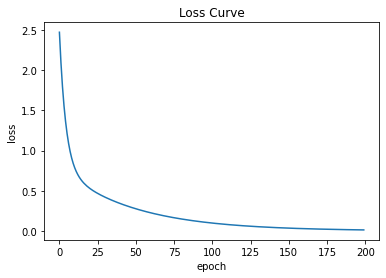

In [8]:
plt.title('Loss Curve')
plt.plot(history1.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [9]:
model.predict([10.0])

array([[18.673744]], dtype=float32)

## Part 3: Neural Networks

### 3.1 Multilayer Perceptron
![image](https://www.researchgate.net/profile/Facundo_Bre/publication/321259051/figure/fig1/AS:614329250496529@1523478915726/Artificial-neural-network-architecture-ANN-i-h-1-h-2-h-n-o.png)

As the name suggests, a multilayer perceptron (MLP) is a network of neurons or perceptrons arrange and connected horizontally and vertically. In this setup, neurons share knowledge along their respective layer and passes the activated values to the next layers to have a sense of "deep" learning. The concept of MLP gave rise to develop the new field of machine learning—Deep Learning, where we study about Artificial Neural Networks (ANN).

An ANN consists of three parts:
* Input layer
* Hidden layer(s)
* Output layer
However, when counting the number of layers of a neural network we exclude the input layer since no learning is happening at the input layer or Layer 0 ($L0$).

In [10]:
### Multilayer Perceptron
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=16,input_shape=[1]), #Hidden Layer
  tf.keras.layers.Dense(units=1) #Output layer
])

lr=0.01
model.compile(optimizer=SGD(learning_rate=lr),
              loss=MSE)
model.summary()
history2=model.fit(X,y, epochs=200)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
1/1 [==============================] - 0s 187ms/step - loss: 18.7195
Epoch 2/200
1/1 [==============================] - 0s 5ms/step - loss: 6.6108
Epoch 3/200
1/1 [==============================] - 0s 4ms/step - loss: 2.6740
Epoch 4/200
1/1 [==============================] - 0s 7ms/step - loss: 1.3864
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 0.9862
Epoch 6/200
1/1 [==============================] - 0s 6ms/step - loss: 0.8400
Epoch 7/200
1/1 [==============================] 

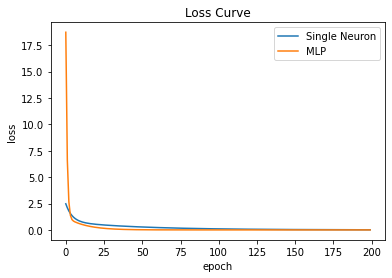

In [11]:
plt.title('Loss Curve')
plt.plot(history1.history['loss'], label='Single Neuron')
plt.plot(history2.history['loss'], label='MLP')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [12]:
model.predict([10.0])

array([[18.999773]], dtype=float32)

### 3.2 Activation Functions

![image](https://www.researchgate.net/profile/Junxi_Feng/publication/335845675/figure/fig3/AS:804124836765699@1568729709680/Commonly-used-activation-functions-a-Sigmoid-b-Tanh-c-ReLU-and-d-LReLU.ppm)

Back in our discussion about the neuron, we know that an activaiton function is quite crucial in getting the right values. Different activation functions are used for different objectives of learning. One factor to consider in choosing an activation function is the behavior of outputs per layer or the expected output of the machine learning task. Simply, identifying whether you are classifying data or predicting data could help which activation function to use.

For a deeper discussion and implementation check out:
* [Activation functions in TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
* [Activation functions in Keras](https://keras.io/api/layers/activations/)


In [2]:
from tensorflow.keras.layers import Activation
from tensorflow.nn import sigmoid, tanh, softmax, relu, leaky_relu

In [14]:
inputs = tf.constant([
                      [0.0,-1.2,2.4,32.0,-20.1]
                      ])
print(inputs)

tf.Tensor([[  0.   -1.2   2.4  32.  -20.1]], shape=(1, 5), dtype=float32)


In [15]:
### Sigmoid
sigmoid_layer = Activation(sigmoid)
sigmoid_layer(inputs).numpy()

array([[5.0000000e-01, 2.3147522e-01, 9.1682732e-01, 1.0000000e+00,
        1.8650081e-09]], dtype=float32)

In [41]:
### Tanh
tanh_layer = Activation(tanh)
tanh_layer(inputs).numpy()

array([[ 0.        , -0.8336546 ,  0.98367494,  1.        , -1.        ]],
      dtype=float32)

In [42]:
### Softmax
softmax_layer = Activation(softmax)
softmax_layer(inputs).numpy()

array([[1.2664166e-14, 3.8143706e-15, 1.3959928e-13, 1.0000000e+00,
        2.3618817e-23]], dtype=float32)

In [43]:
### ReLU
relu_layer = Activation(relu)
relu_layer(inputs).numpy()

array([[ 0. ,  0. ,  2.4, 32. ,  0. ]], dtype=float32)

In [44]:
### Leaky ReLU
lrelu_layer = Activation(leaky_relu)
lrelu_layer(inputs).numpy()

array([[ 0.        , -0.24000001,  2.4       , 32.        , -4.02      ]],
      dtype=float32)

### 3.3 Computer Vision
Using deep neural network to solve image processing problems leads to the developing computer vision solutions. The goal of computer vision is to mimic the visio-cognitive functions of the brain. The main activities being done in computer vision include image and video recognition systems. For almost a decade there are a lot of effort being made in improving image systems in which the following tasks were introduced:
![image](https://3.bp.blogspot.com/-e-V_TvNbMSc/XJ7uRvmc4CI/AAAAAAAADPo/47Cg4DqI-g45qQEDRYuPwgaEiqqYDq2wACLcBGAs/s1600/cnn-extensions.png)

In [10]:
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [5]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(28, 28)

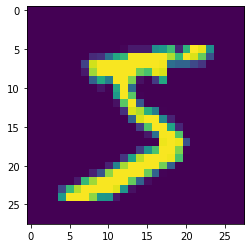

In [6]:
plt.imshow(training_images[0])
training_images[0].shape

In [7]:
training_images  = training_images / 255.0
test_images = test_images / 255.0


In [14]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(64, activation=relu), 
                                    tf.keras.layers.Dense(10, activation=softmax)
])

In [15]:
model.compile(optimizer=Adam(),
              loss=sparse_categorical_crossentropy,
              metrics=['accuracy'])
history3 = model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5047 - accuracy: 0.8552
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1539 - accuracy: 0.9559
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1020 - accuracy: 0.9696
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0838 - accuracy: 0.9751
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0638 - accuracy: 0.9812


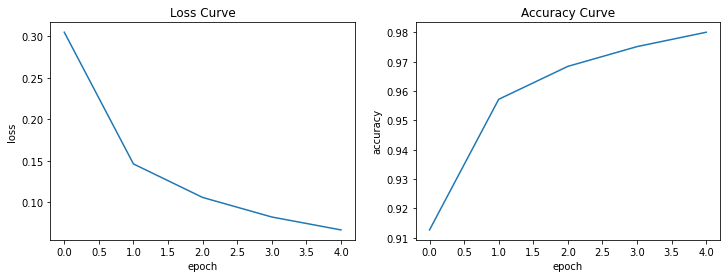

In [16]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.title('Loss Curve')
plt.plot(history3.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

plt.subplot(122)
plt.title('Accuracy Curve')
plt.plot(history3.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

In [17]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0884 - accuracy: 0.9744


[0.08844652026891708, 0.974399983882904]

What if we add more layers?

In [20]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=relu), 
                                    tf.keras.layers.Dense(64, activation=relu),
                                    tf.keras.layers.Dense(10, activation=softmax)
])

In [21]:
model.compile(optimizer=Adam(),
              loss=sparse_categorical_crossentropy,
              metrics=['accuracy'])
history4 = model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4386 - accuracy: 0.8734
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1130 - accuracy: 0.9649
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0722 - accuracy: 0.9772
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0544 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0402 - accuracy: 0.9862


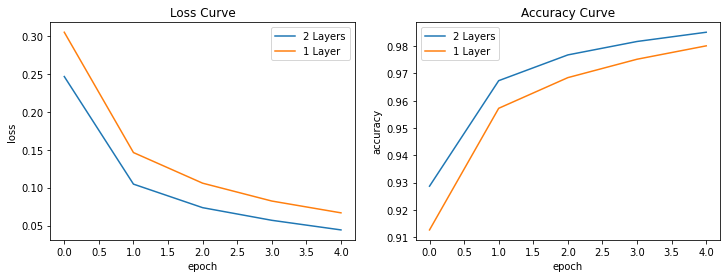

In [22]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.title('Loss Curve')
plt.plot(history4.history['loss'], label='2 Layers')
plt.plot(history3.history['loss'], label='1 Layer')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epoch')

plt.subplot(122)
plt.title('Accuracy Curve')
plt.plot(history4.history['accuracy'], label='2 Layers')
plt.plot(history3.history['accuracy'], label='1 Layer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()

### 3.4 Convolutional Neural Networks
Last week, we saw what convolutions do to images to get or localize some features. In deep learning, convolutions have also proven very useful in extracting information from images and learning from them.

In 1998, [LeCunn et. al](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf) introduced the implementation of convolutional neural networks for computer vision. But the first idea of using convolutions for visual cognition was [first conceptualized](https://medium.com/@gopalkalpande/biological-inspiration-of-convolutional-neural-network-cnn-9419668898ac) by Hubel and Wiesel in 1962, taking consideration of the processes visual cortex of the brain.

![image](https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png)

You may notice some new terminologies in this section, let's break down the technicalities of CNNs.

<b>Feature Maps</b>—feature maps are the learnt filters for convolutions. Recall that we need kernels in to perform convolutions, in CNNs we are trying to learn which are the appropriate values of kernels to get the feature that we want from the image.

<b>Subsampling</b>—subsampling is a method of reducing the dimensions of an image or feature maps but retaining vital information. To achieve this, we tend to use pooling techniques such as maxima pooling or average pooling.

<b>Full connections</b>—in the later layers of a CNN feature maps are flattened into a vector so we could run in through an MLP to determine the defining features of the the image



In [23]:
mnist = mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [25]:
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(32, (3,3), 
                                 activation='relu', input_shape=(28,28,1)),
          tf.keras.layers.MaxPooling2D((2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss=sparse_categorical_crossentropy,
    metrics=['accuracy']
)
history5= model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2994 - accuracy: 0.9123
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0512 - accuracy: 0.9846
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0315 - accuracy: 0.9903
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0198 - accuracy: 0.9939
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0129 - accuracy: 0.9958


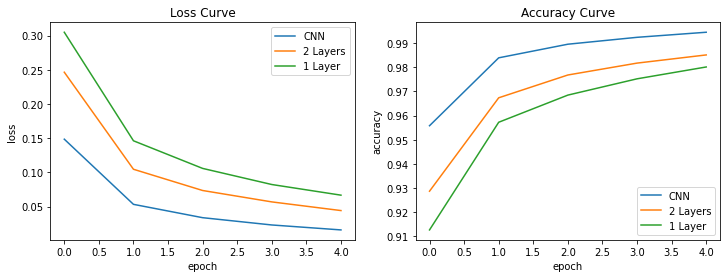

In [26]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.title('Loss Curve')
plt.plot(history5.history['loss'], label='CNN')
plt.plot(history4.history['loss'], label='2 Layers')
plt.plot(history3.history['loss'], label='1 Layer')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epoch')

plt.subplot(122)
plt.title('Accuracy Curve')
plt.plot(history5.history['accuracy'], label='CNN')
plt.plot(history4.history['accuracy'], label='2 Layers')
plt.plot(history3.history['accuracy'], label='1 Layer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()

## Part 4: Custom Training

### 4.1 Importing Images

In [28]:
from google.colab import drive
import os
drive.mount('/content/drive')

!ls drive/MyDrive/ICpEP\ AI\ Workshop\ Files/ds/
data_dir = "drive/MyDrive/ICpEP AI Workshop Files/ds/"
dir = os.listdir(data_dir)
for folder in dir:
  print(os.listdir(data_dir+folder))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
test  train
['dog', 'not-dog']
['dog', 'not-dog']


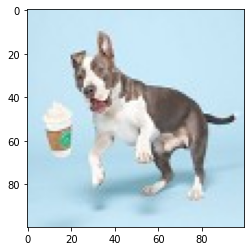

In [38]:
dog_img = cv2.cvtColor(cv2.imread(data_dir+dir[0]+'/dog1.jpg'), 
                       cv2.COLOR_BGR2RGB)
plt.imshow(dog_img)

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
TRAIN_DIR = data_dir+'train'
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                     class_mode='binary',
                                                     target_size=(100,100))


Found 20 images belonging to 2 classes.


In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
history6 = model.fit(train_generator,
                              epochs=20,
                              verbose=1)

Epoch 1/20
1/1 [==============================] - 1s 616ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 39ms/step - loss: 0.6297 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 39ms/step - loss: 0.9400 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 38ms/step - loss: 0.5695 - accuracy: 0.5500
Epoch 5/20
1/1 [==============================] - 0s 40ms/step - loss: 0.5304 - accuracy: 0.6000
Epoch 6/20
1/1 [==============================] - 0s 39ms/step - loss: 0.5414 - accuracy: 0.6000
Epoch 7/20
1/1 [==============================] - 0s 41ms/step - loss: 0.4485 - accuracy: 0.8500
Epoch 8/20
1/1 [==============================] - 0s 40ms/step - loss: 0.3997 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 44ms/step - loss: 0.3575 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 43ms/step - loss: 0.2674 - accuracy: 0.9500
Epoch 11/20
1/1 [===========

No handles with labels found to put in legend.


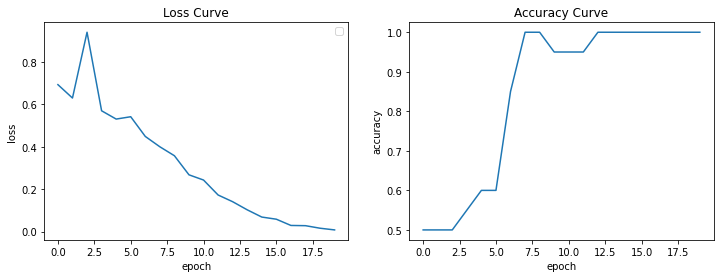

In [35]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.title('Loss Curve')
plt.plot(history6.history['loss'])
plt.legend()
plt.ylabel('loss')
plt.xlabel('epoch')

plt.subplot(122)
plt.title('Accuracy Curve')
plt.plot(history6.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

In [36]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

def upload_and_predict():
  uploaded = files.upload()

  for fn in uploaded.keys():
  
    # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(100, 100))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)
    print(classes[0])
    if classes[0]>0.5:
      print(fn + " is a dog")
    else:
      print(fn + " is not a dog")
upload_and_predict()

Saving test4.jpg to test4.jpg
[0.]
test4.jpg is not a dog


#### <i>Bias—Variance Tradeoff</i>
![image](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F3335785%2F728627205a9dc976248c9f05a2baf464%2F1.png?generation=1600257419469907&alt=media)

The bias—variance tradeoff is an essential topic to learn in debugging machine learning models. Overfitting and underfitting can be more understood if you know about biases and variance.

<b>Bias</b>—the bias refers to the difference between the average prediction of the model and the groud truths. Models with high bias over-generalize the training data failing to "learn". This is refered to as <b>underfitting</b>.

<b>Variance</b>—the variance of a model refers to the amount that the estimate of the target function will change if different training data was used. models with high variance is too "specialized" or overtrained on the dataset and fails to be flexible with data not in the training set. This is referred to as <b>overfitting</b>.

<b><i>Remedies</b></i>

To solve <b>underfitting</b> you might to:
* Train longer, 
* Add features,
* Choose more appropriate models,
* Adding more layers (complexity) to the model, or
* Choose a more appropriate loss or optimizer

To solve <b>overfitting</b> you might to:
* Train shorter, 
* Add more varieties or samples (generalizing), or
* Apply regularization techniques such as batch normalization, data augmentation, dropout, etc.

### 4.2 Validation Sets
To see the bias-variance tradeoff better in traning we need to have a validation set during training. The similarity between the test and validation set are that they are both data from the same dataset but not part of the training and they can be used to determine bias and variance. The difference is that validation sets are tested with the model during training while test sets are checked with the model post-training.

There are also deployment sets that are considered another post-training dataset but are sampled from an actual area of deployment.

For our example, we will be using [Image Data Generators](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator). Image data generators came from TensorFlow's image processing API. It allows us to pre-transform our dataset in-memory.

In [37]:
TRAIN_DIR = data_dir+'train'
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                     class_mode='binary',
                                                     target_size=(100,100))


Found 20 images belonging to 2 classes.


In [38]:
VALIDATION_DIR = data_dir+'test'
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validaiton_generator = train_datagen.flow_from_directory(VALIDATION_DIR,
                                                     class_mode='binary',
                                                     target_size=(100,100))

Found 4 images belonging to 2 classes.


In [65]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
history7 = model.fit(train_generator,
                              epochs=15,
                              verbose=1,
                     validation_data=validaiton_generator)

Epoch 1/15
5/5 [==============================] - 1s 59ms/step - loss: 1.3177 - accuracy: 0.5208 - val_loss: 1.4073 - val_accuracy: 0.5000
Epoch 2/15
5/5 [==============================] - 0s 29ms/step - loss: 1.1840 - accuracy: 0.5000 - val_loss: 0.7799 - val_accuracy: 0.5000
Epoch 3/15
5/5 [==============================] - 0s 31ms/step - loss: 0.9868 - accuracy: 0.4271 - val_loss: 0.9583 - val_accuracy: 0.7500
Epoch 4/15
5/5 [==============================] - 0s 31ms/step - loss: 0.6575 - accuracy: 0.7681 - val_loss: 0.7341 - val_accuracy: 0.5000
Epoch 5/15
5/5 [==============================] - 0s 29ms/step - loss: 0.6999 - accuracy: 0.5646 - val_loss: 0.6657 - val_accuracy: 0.5000
Epoch 6/15
5/5 [==============================] - 0s 30ms/step - loss: 0.5828 - accuracy: 0.6514 - val_loss: 0.6653 - val_accuracy: 0.2500
Epoch 7/15
5/5 [==============================] - 0s 32ms/step - loss: 0.5969 - accuracy: 0.7257 - val_loss: 0.6364 - val_accuracy: 0.7500
Epoch 8/15
5/5 [===========

No handles with labels found to put in legend.


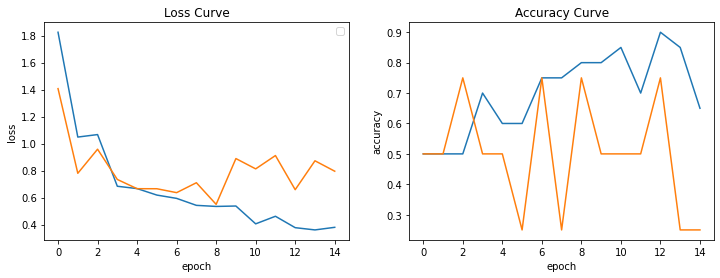

In [67]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.title('Loss Curve')
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.legend()
plt.ylabel('loss')
plt.xlabel('epoch')

plt.subplot(122)
plt.title('Accuracy Curve')
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

In [68]:
upload_and_predict()

Saving test4.jpg to test4 (4).jpg
[1.0196558e-25]
test4.jpg is not a dog


### 4.3 Data Augmentation

In [60]:
TRAIN_DIR = data_dir+'train'
train_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                     class_mode='binary',
                                                    batch_size=4,
                                                     target_size=(100,100))

VALIDATION_DIR = data_dir+'test'
validation_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
      )
validaiton_generator = train_datagen.flow_from_directory(VALIDATION_DIR,
                                                     class_mode='binary',
                                                     batch_size=4,
                                                     target_size=(100,100))

Found 20 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [61]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
history8 = model.fit(train_generator,
                              epochs=15,
                              verbose=1,
                     validation_data=validaiton_generator)

Epoch 1/15
5/5 [==============================] - 1s 67ms/step - loss: 1.0792 - accuracy: 0.5188 - val_loss: 0.9340 - val_accuracy: 0.5000
Epoch 2/15
5/5 [==============================] - 0s 62ms/step - loss: 0.9946 - accuracy: 0.3896 - val_loss: 0.6863 - val_accuracy: 0.5000
Epoch 3/15
5/5 [==============================] - 0s 30ms/step - loss: 0.6487 - accuracy: 0.5229 - val_loss: 0.6982 - val_accuracy: 0.5000
Epoch 4/15
5/5 [==============================] - 0s 28ms/step - loss: 0.6104 - accuracy: 0.7153 - val_loss: 0.7222 - val_accuracy: 0.5000
Epoch 5/15
5/5 [==============================] - 0s 28ms/step - loss: 0.5956 - accuracy: 0.6056 - val_loss: 0.7380 - val_accuracy: 0.5000
Epoch 6/15
5/5 [==============================] - 0s 30ms/step - loss: 0.5732 - accuracy: 0.7028 - val_loss: 0.7707 - val_accuracy: 0.2500
Epoch 7/15
5/5 [==============================] - 0s 33ms/step - loss: 0.5400 - accuracy: 0.7597 - val_loss: 1.0221 - val_accuracy: 0.7500
Epoch 8/15
5/5 [===========

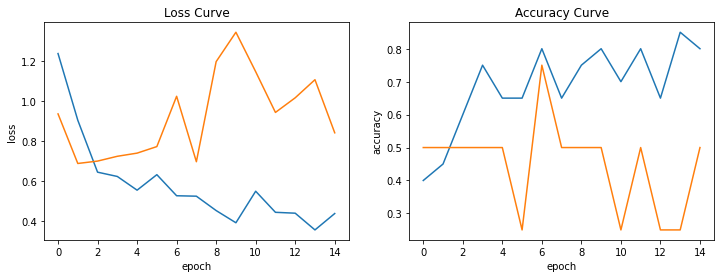

In [63]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.title('Loss Curve')
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

plt.subplot(122)
plt.title('Accuracy Curve')
plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

In [71]:
upload_and_predict()

Saving test1.jpg to test1.jpg
[0.]
test1.jpg is not a dog
